![Shark attacks, a project by Roberto Henríquez Perozo. Data Analytics Bootcamp at IronHack](shark-attacks.png)

<center>You can clone the repo of this project at <br>https://github.com/rihp/shark-attacks </center>

 <center><h1> PART II <br> Data analysis and hypothesis formulation</h1> </center>
 
 

In [1]:
# You should have an exported.csv file. 
# We generated it while following along the 'PART I' of this project. 
# Do you have it?
!ls
# If you don't, you can download the 'PART I' from: https://github.com/rihp/shark-attacks

analysis.ipynb	clean.ipynb   README.md
attacks.csv	exported.csv  shark-attacks.png


In [2]:
import pandas as pd
import random
import matplotlib

# Loading the cleaned dataset as a dataframe
df = pd.read_csv('exported.csv')
df

,Unnamed: 0,CaseNum,Date,Year,Type,Country,Area,Location,Activity,Sex,Injury,Fatal,Species,Source,href,Species2,Activity2,Provoked
0,0,2018.06.25,25-Jun-2018,2018.0,Boat,USA,California,"Oceanside, San Diego County",Paddling,F,"No injury to occupant, outrigger canoe and pad...",N,White shark,"R. Collier, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...,White shark,Paddling,"No injury to occupant, outrigger canoe and pad..."
1,1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,Minor injury to left thigh,N,Invalid,"K.McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_di...,INVALID ENTRY,Standing,Minor injury to left thigh
2,2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,Injury to left lower leg from surfboard skeg,N,Invalid,"K.McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_di...,INVALID ENTRY,Surfing,Injury to left lower leg from surfboard skeg
3,3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,Minor injury to lower leg,N,2 m shark,"B. Myatt, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...,OTHER / NOT KNOWN,Surfing,Minor injury to lower leg
4,4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,M,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m",A .Kipper,http://sharkattackfile.net/spreadsheets/pdf_di...,Tiger shark,Diving,PROVOKED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,M,FATAL,Y,Invalid,"H. Taunton; N. Bartlett, p. 234",http://sharkattackfile.net/spreadsheets/pdf_di...,INVALID ENTRY,Diving,FATAL
6298,6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,M,FATAL,Y,Invalid,"H. Taunton; N. Bartlett, pp. 233-234",http://sharkattackfile.net/spreadsheets/pdf_di...,INVALID ENTRY,Diving,FATAL
6299,6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,M,FATAL,Y,Invalid,"F. Schwartz, p.23; C. Creswell, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...,INVALID ENTRY,Swimming,FATAL
6300,6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,M,FATAL,Y,Invalid,"The Sun, 10/20/1938",http://sharkattackfile.net/spreadsheets/pdf_di...,INVALID ENTRY,NOT SPECIFIED,FATAL


In [3]:
df.columns

Index(['Unnamed: 0', 'CaseNum', 'Date', 'Year', 'Type', 'Country', 'Area',
       'Location', 'Activity', 'Sex', 'Injury', 'Fatal', 'Species', 'Source',
       'href', 'Species2', 'Activity2', 'Provoked'],
      dtype='object')

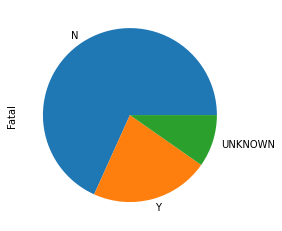

In [4]:
%matplotlib inline
# df1 = df.Species.value_counts()
s_fatal = df.Fatal.value_counts()

#
plot = s_fatal.plot.pie()

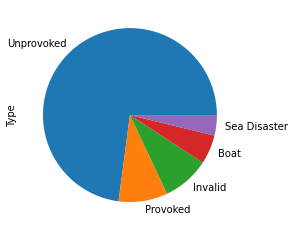

In [5]:
df.Type.value_counts().plot.pie()

In [6]:
# This plot is a mess, don't graph it
# df.Location.value_counts().plot.pie()

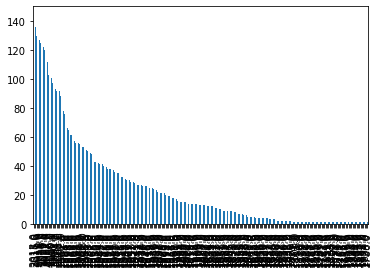

In [7]:
df.Year.value_counts().plot.bar()

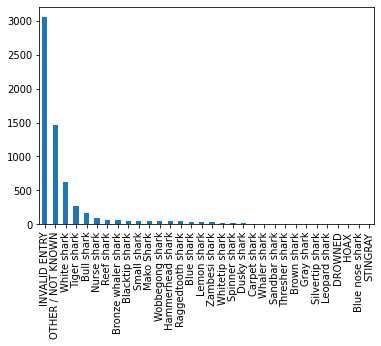

In [8]:
df.Species2.value_counts().plot.bar()

In [9]:
df[~df['Fatal'].isin(['UNKNOWN'])][['Species2', 'Fatal']]

,Species2,Fatal
0,White shark,N
1,INVALID ENTRY,N
2,INVALID ENTRY,N
3,OTHER / NOT KNOWN,N
4,Tiger shark,N
...,...,...
6297,INVALID ENTRY,Y
6298,INVALID ENTRY,Y
6299,INVALID ENTRY,Y
6300,INVALID ENTRY,Y


# I want to make a new column that specifies, the species and if it was deadly or not
Firts, I'll take any values which don't contribute to our research, and focus only on the deadliest species

In [29]:
fatals_filetred = ~df.Fatal.isin(['UNKNOWN'])

In [11]:
# Define the sharks I want to consider
killer_sharks =['White shark','Tiger shark', 'Bull shark', 'Nurse shark']

# How many samples of each species are there?
print(df.Species2[df.Species2.isin(killer_sharks)].value_counts())

# Create a dataframe containing only the indexes with those species
species_fatality = df[df.Species2.isin(killer_sharks)]
#df.Species2.value_counts()

White shark    625
Tiger shark    275
Bull shark     171
Nurse shark     94
Name: Species2, dtype: int64


In [12]:
species_fatality = df[df.Species2.isin(killer_sharks)]

In [32]:
species_fatality = species_fatality#.reset_index()
species_fatality[['Fatal', 'Species2']]
species_fatality[fatals_filetred].value_counts()

N    901
Y    247
Name: Fatal, dtype: int64

In [33]:
species_fatality = species_fatality[fatals_filetred]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [37]:
print(dfx.Fatal.value_counts())
print()
print(dfx.Species2.value_counts())

N    901
Y    247
Name: Fatal, dtype: int64

White shark    614
Tiger shark    271
Bull shark     170
Nurse shark     93
Name: Species2, dtype: int64


In [14]:
sx = df.groupby(["Fatal", "Species2"]).agg({"Date":["min", "max"]})
sx

Date                           
                                              min                        max
Fatal   Species2                                                            
N       Blacktip shark                03-Jul-1995       Reported 29-Mar-2011
        Blue nose shark               13-Mar-1935                18-Nov-1928
        Blue shark                    02-Mar-2009                   Sep-1921
        Bronze whaler shark           01-Feb-1986                Summer 1974
        Brown shark                   24-Jun-2003                   May-1952
        Bull shark                    05-Aug-2013       Reported 28-Feb-2011
        Carpet shark                  09-Feb-1975       Reported 18-Feb-1950
        Dusky shark                   03-Jul-1954  Reported      23-Aug-1998
        Gray shark                    01-Jul-1981                   Mar-1948
        Hammerhead shark              02-Dec-1968                Summer-2008
        INVALID ENTRY                 03-Feb-1914               World War II
        Lemon shark                   02-Oct-2010       Reported 17-Jun-2014
        Leopard shark                 10-Feb-1955                       1995
        Mako Shark                    10-Jan-2009                   Sep-1906
        Nurse shark                   01-Sep-2013                Summer 1948
        OTHER / NOT KNOWN             05-Oct-1985                Winter 1969
        Raggedtooth shark             29-Oct-2011       Reported 20-Apr-1960
        Reef shark                    01-Feb-2017       Reported 17-Mar-2009
        STINGRAY                      04-Nov-1963                04-Nov-1963
        Sandbar shark                 09-Jun-2014                   Aug-1967
        Silvertip shark                      1989                Before 1996
        Small shark                   01-Jan-2015       Reported 28-Jul-1931
        Spinner shark                 02-Jun-1997              Late Aug-1982
        Thresher shark                12-Jul-1926       Reported 15-Jun-1981
        Tiger shark                   29-Jul-2013                   Sep-2015
        Whaler shark                  11-Nov-1939                 5-Jul-1975
        White shark                   29-Oct-2011                   Sep-2017
        Whitetip shark                02-Jun-2009       Reported 27-Jun-2014
        Wobbegong shark               02-May-2006       Reported 25-Jun-2015
        Zambesi shark                 01-Jan-1971       Reported 29-Oct-2009
UNKNOWN Blue shark                    10-Jun-2012                10-Jun-2012
        Bronze whaler shark           02-Jun-2016                02-Jun-2016
        Bull shark           Reported 08-Jan-2017       Reported 08-Jan-2017
        DROWNED                       01-Oct-2017                01-Oct-2017
        Dusky shark                   14-Jan-1923                14-Jan-1923
        HOAX                          11-Jul-1982                14-Dec-2007
        INVALID ENTRY              \n1951.12.15.R                   Sep-2016
        Nurse shark                   11-Jan-1932                11-Jan-1932
        OTHER / NOT KNOWN             02-Jun-1899             Summer of 1996
        Reef shark                    18-Apr-2016                18-Apr-2016
        Small shark                   29-Jul-2017                29-Jul-2017
        Tiger shark                  03- Dec-1989       Reported 19-Apr-2008
        White shark                   01-Oct-1989                   Mar-1981
        Wobbegong shark                  Apr-1970                   Apr-1970
Y       Blue shark                    08-Aug-1955                25-Jul-1959
        Bronze whaler shark           02-Jan-1976                24-Mar-1962
        Bull shark                    10-Jan-1903                Before 1957
        DROWNED              Reported 25-Nov-2017       Reported 25-Nov-2017
        Hammerhead shark      No date, late 1960s       Reported 15-Jul-1834
        INVALID ENTRY                 15-

In [15]:
sx = df.groupby(["Fatal", "Species2"]).agg({"Date":["min", "max"]})
sx

Date                           
                                              min                        max
Fatal   Species2                                                            
N       Blacktip shark                03-Jul-1995       Reported 29-Mar-2011
        Blue nose shark               13-Mar-1935                18-Nov-1928
        Blue shark                    02-Mar-2009                   Sep-1921
        Bronze whaler shark           01-Feb-1986                Summer 1974
        Brown shark                   24-Jun-2003                   May-1952
        Bull shark                    05-Aug-2013       Reported 28-Feb-2011
        Carpet shark                  09-Feb-1975       Reported 18-Feb-1950
        Dusky shark                   03-Jul-1954  Reported      23-Aug-1998
        Gray shark                    01-Jul-1981                   Mar-1948
        Hammerhead shark              02-Dec-1968                Summer-2008
        INVALID ENTRY                 03-Feb-1914               World War II
        Lemon shark                   02-Oct-2010       Reported 17-Jun-2014
        Leopard shark                 10-Feb-1955                       1995
        Mako Shark                    10-Jan-2009                   Sep-1906
        Nurse shark                   01-Sep-2013                Summer 1948
        OTHER / NOT KNOWN             05-Oct-1985                Winter 1969
        Raggedtooth shark             29-Oct-2011       Reported 20-Apr-1960
        Reef shark                    01-Feb-2017       Reported 17-Mar-2009
        STINGRAY                      04-Nov-1963                04-Nov-1963
        Sandbar shark                 09-Jun-2014                   Aug-1967
        Silvertip shark                      1989                Before 1996
        Small shark                   01-Jan-2015       Reported 28-Jul-1931
        Spinner shark                 02-Jun-1997              Late Aug-1982
        Thresher shark                12-Jul-1926       Reported 15-Jun-1981
        Tiger shark                   29-Jul-2013                   Sep-2015
        Whaler shark                  11-Nov-1939                 5-Jul-1975
        White shark                   29-Oct-2011                   Sep-2017
        Whitetip shark                02-Jun-2009       Reported 27-Jun-2014
        Wobbegong shark               02-May-2006       Reported 25-Jun-2015
        Zambesi shark                 01-Jan-1971       Reported 29-Oct-2009
UNKNOWN Blue shark                    10-Jun-2012                10-Jun-2012
        Bronze whaler shark           02-Jun-2016                02-Jun-2016
        Bull shark           Reported 08-Jan-2017       Reported 08-Jan-2017
        DROWNED                       01-Oct-2017                01-Oct-2017
        Dusky shark                   14-Jan-1923                14-Jan-1923
        HOAX                          11-Jul-1982                14-Dec-2007
        INVALID ENTRY              \n1951.12.15.R                   Sep-2016
        Nurse shark                   11-Jan-1932                11-Jan-1932
        OTHER / NOT KNOWN             02-Jun-1899             Summer of 1996
        Reef shark                    18-Apr-2016                18-Apr-2016
        Small shark                   29-Jul-2017                29-Jul-2017
        Tiger shark                  03- Dec-1989       Reported 19-Apr-2008
        White shark                   01-Oct-1989                   Mar-1981
        Wobbegong shark                  Apr-1970                   Apr-1970
Y       Blue shark                    08-Aug-1955                25-Jul-1959
        Bronze whaler shark           02-Jan-1976                24-Mar-1962
        Bull shark                    10-Jan-1903                Before 1957
        DROWNED              Reported 25-Nov-2017       Reported 25-Nov-2017
        Hammerhead shark      No date, late 1960s       Reported 15-Jul-1834
        INVALID ENTRY                 15-

In [16]:
def filt(x):
    if x =='UNKNOWN':
        return None
    else:
        return x
df.reset_index()
Fatal_na = df.Fatal.isin(['UNKNOWN'])
Species_na = df.Species2.isin(['INVALID ENTRY', 'OTHER / NOT KNOWN'])
sx = df.loc[~Fatal_na].groupby(["Fatal", "Species2"]).agg({"Type":"count"})
sy = df.loc[~Species_na]
# avoid.value_counts()
#Species_na.value_counts()
#df[~Fatal_na, ~Species_na]
sp_na = df[~Species_na]
df_nonull = sp_na[~Fatal_na]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [17]:
df_ok = df_nonull.reset_index()
# df_ok.head().plot.scatter(df_ok.Species2,df_ok.Fatal)

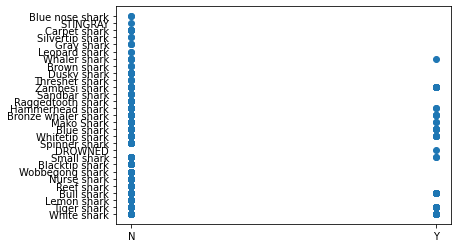

In [18]:
matplotlib.pyplot.scatter(df_nonull.Fatal, df_nonull.Species2)


In [19]:
dfx = df[['Species2','Fatal']]
dfx.isnull().sum()

Species2    0
Fatal       0
dtype: int64

In [20]:
avoid1 = ~df['Fatal'].isin(['UNKNOWN'])
avoid2 = ~df['Species2'].isin(['OTHER / NOT KNOWN', 'INVALID ENTRY'])
df2p = df[avoid1][avoid2][['Species2', 'Fatal']]
#df2p.plot.bar('Fatal', 'Species2')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
df2p.Fatal.values

array(['N', 'N', 'Y', ..., 'Y', 'N', 'Y'], dtype=object)

In [22]:
df2p.Species2.values

array(['White shark', 'Tiger shark', 'Tiger shark', ..., 'Bull shark',
       'White shark', 'Tiger shark'], dtype=object)

In [23]:
Yes = (lambda x: True if x == 'Y' else False)
df2p.groupby('Species2').agg({"Fatal" : Yes})

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
df.columns